In [ ]:
# Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
%matplotlib inline

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import time
from wordcloud import WordCloud
from sklearn.ensemble import GradientBoostingClassifier

# Data Prep

- melakukan pre-processing data (beda file)
- clean data (menghilangkan duplikasi, membuang kolom gak penting)

In [ ]:
df = pd.read_csv("Exmple-Model - Sheet4.csv")
df['Label'] = df['Label'].fillna(0)
df['Label'] = df['Label'].astype(int)
df

,Datetime,Tweet Url,Text,Username,Hashtags,tweet_tokens_stemmed,Label
0,2023-01-09 09:42:25+00:00,https://twitter.com/restabengkulu/status/16123...,potret kekompakan kapolri jenderal polisi drs ...,restabengkulu,NaN,"['potret', 'kompak', 'kapolri', 'jenderal', 'p...",1
1,2023-01-09 09:42:16+00:00,https://twitter.com/lilahimala/status/16123842...,kita yakin pak prabowo subianto yang memang pi...,lilahimala,NaN,"['prabowo', 'subianto', 'pilih', 'ambil', 'hat...",1
2,2023-01-09 09:41:38+00:00,https://twitter.com/bbableaj/status/1612384091...,jk tuh jokowi nggak lh kak kataku mah sungjin ...,bbableaj,NaN,"['jk', 'jokowi', 'tidak', 'lh', 'kata', 'sungj...",1
3,2023-01-09 09:40:28+00:00,https://twitter.com/genx36545403/status/161238...,pak prabowo kan orang baik jadi saya hanya tit...,genx36545403,"['PeduliRakyat', 'kerjasama']","['prabowo', 'titip', 'didengerin', 'pikiranpik...",1
4,2023-01-09 09:40:27+00:00,https://twitter.com/genx36545403/status/161238...,yang saya kenal pak prabowo orang yang sangat ...,genx36545403,"['PeduliRakyat', 'kerjasama']","['kenal', 'prabowo', 'rasional', 'ajak', 'piki...",1
...,...,...,...,...,...,...,...
14998,2023-03-12 08:30:21+00:00,https://twitter.com/KadrunSlayer/status/163483...,user ke negara org cuman jelekin negara sendir...,KadrunSlayer,NaN,"['user', 'negara', 'orang', 'hanya', 'jelekin'...",0
14999,2023-03-12 08:30:13+00:00,https://twitter.com/SecretsThe/status/16348341...,user saya pernah ke aussie mereka kenal pak jo...,SecretsThe,NaN,"['user', 'aussie', 'kenal', 'jokowi', 'salute'...",0
15000,2023-03-12 08:29:21+00:00,https://twitter.com/HarefIrwan/status/16348339...,user emang lu siapa,HarefIrwan,NaN,"['user', 'emang', 'kamu']",0
15001,2023-03-12 08:29:09+00:00,https://twitter.com/SyahruD82778703/status/163...,user fotografer nya perlu diarahin lg biar nam...,SyahruD82778703,NaN,"['user', 'fotografer', 'diarahin', 'lagi', 'na...",0


In [ ]:
df.shape

(15003, 7)

In [ ]:
# check for duplicates
duplicates = df[df.duplicated(subset=['Text'])]

print("Number of duplicates:", duplicates.shape[0])

Number of duplicates: 3392


In [ ]:
# remove duplicates
df.drop_duplicates(subset=['Text'], inplace=True)

print("Number of unique data:", df.shape[0])

Number of unique data: 11611


In [ ]:
# list of columns to remove
cols_to_remove = [#'User Created',
                  #'Followers Count',
                  #'Retweet Count',
                  #'Like Count',
                  #'Reply Count',
                  'Hashtags']

# remove columns
df = df.drop(cols_to_remove, axis=1)
df.head()

,Datetime,Tweet Url,Text,Username,tweet_tokens_stemmed,Label
0,2023-01-09 09:42:25+00:00,https://twitter.com/restabengkulu/status/16123...,potret kekompakan kapolri jenderal polisi drs ...,restabengkulu,"['potret', 'kompak', 'kapolri', 'jenderal', 'p...",1
1,2023-01-09 09:42:16+00:00,https://twitter.com/lilahimala/status/16123842...,kita yakin pak prabowo subianto yang memang pi...,lilahimala,"['prabowo', 'subianto', 'pilih', 'ambil', 'hat...",1
2,2023-01-09 09:41:38+00:00,https://twitter.com/bbableaj/status/1612384091...,jk tuh jokowi nggak lh kak kataku mah sungjin ...,bbableaj,"['jk', 'jokowi', 'tidak', 'lh', 'kata', 'sungj...",1
3,2023-01-09 09:40:28+00:00,https://twitter.com/genx36545403/status/161238...,pak prabowo kan orang baik jadi saya hanya tit...,genx36545403,"['prabowo', 'titip', 'didengerin', 'pikiranpik...",1
4,2023-01-09 09:40:27+00:00,https://twitter.com/genx36545403/status/161238...,yang saya kenal pak prabowo orang yang sangat ...,genx36545403,"['kenal', 'prabowo', 'rasional', 'ajak', 'piki...",1


In [ ]:
def check_imbalance(df, target_column):
    count_positive = df[df[target_column] == 1].shape[0]
    count_negative = df[df[target_column] == 0].shape[0]

    total_samples = count_positive + count_negative
    proportion_positive = count_positive / total_samples
    proportion_negative = count_negative / total_samples

    imbalance_threshold = 0.1  # Ambang batas 10%

    if abs(proportion_positive - proportion_negative) > imbalance_threshold:
        print("Dataset is imbalanced")
    else:
        print("Dataset is balanced")


In [ ]:
# Memanggil fungsi check_imbalance dan menyimpan hasilnya
is_imbalanced = check_imbalance(df, 'Label')

Dataset is imbalanced


# Polarity/Label & TextCount

- melihat persebaran data positif dan negatif
- melihat jumlah data yang positif dan negatif

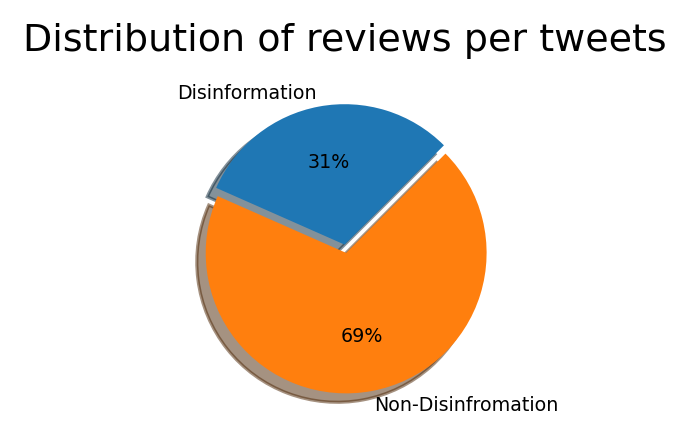

In [ ]:
users = df.Label.value_counts()
Dis=users[1]
NonDis=users[0]

#gender=["Male","Female"]
size=[Dis,NonDis]
plt.figure(figsize=(2,2),dpi=228)
plt.pie(size,labels=['Disinformation','Non-Disinfromation'],explode=[0,0.06], textprops={'fontsize':6},startangle=45, autopct='%1.0f%%',shadow=True)
plt.title("Distribution of reviews per tweets")
plt.gca().set_aspect('equal')
plt.savefig('distributionreviews_tweet.jpg', format='jpeg')
plt.show()

In [ ]:
class TextCounts(BaseEstimator, TransformerMixin):
    df['Text']=df['Text'].apply(str)
    def count_regex(self, pattern, tweet):
        return len(re.findall(pattern, tweet))

    def fit(self, X, y=None, **fit_params):
        # fit method is used when specific operations need to be done on the train data, but not on the test data
        return self

    def transform(self, X, **transform_params):
        count_words = X.apply(lambda x: self.count_regex(r'\w+', x))
        # We will replace the emoji symbols with a description, which makes using a regex for counting easier
        # Moreover, it will result in having more words in the tweet

        df = pd.DataFrame({'count_words': count_words})

        return df
tc = TextCounts()

df_eda = tc.fit_transform(df.Text)
df_eda['Label'] = df.Label

Descriptive stats for count_words
---------------------------------
        count       mean        std  min   25%   50%   75%   max
Label                                                           
0      8026.0  14.367057  10.280118  1.0   7.0  11.0  20.0  52.0
1      3585.0  17.636820  10.147340  1.0  10.0  16.0  25.0  50.0


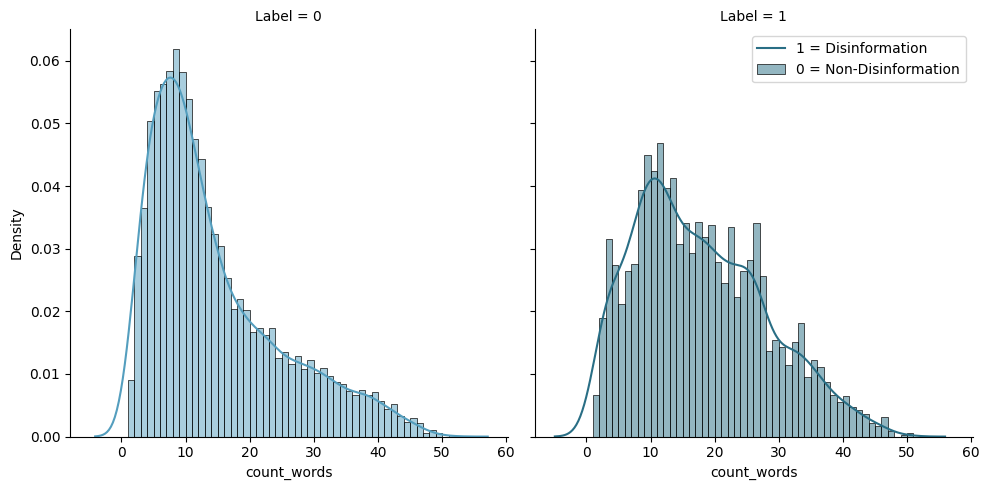

In [ ]:
def show_dist(df, col):
    print('Descriptive stats for {}'.format(col))
    print('-'*(len(col)+22))
    print(df.groupby('Label')[col].describe())
    bins = np.arange(df[col].min(), df[col].max() + 1)
    g = sns.FacetGrid(df, col='Label', height=5, hue='Label', palette="PuBuGn_d")
    g = g.map(sns.histplot, col, kde=True, stat="density", kde_kws=dict(cut=3), bins=bins)

    plt.legend(['1 = Disinformation', '0 = Non-Disinformation'])
    plt.savefig('count_words.jpg', format='jpeg')
    plt.show()
show_dist(df_eda, 'count_words')

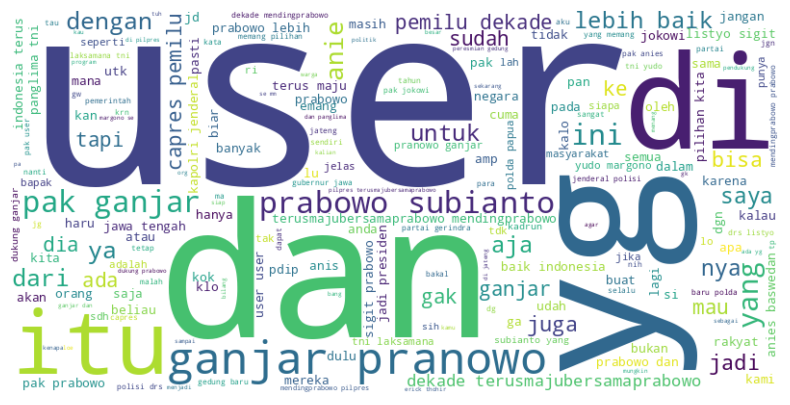

In [ ]:
# Gabungkan semua teks tweet menjadi satu string
all_text = ' '.join(df['Text'])

# Buat objek WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Tampilkan WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('wordCloud.jpg', format='jpeg')
plt.show()

# Vectorizing TF-IDF

In [ ]:
#vectorizer = TfidfVectorizer(max_features=1000)
#vectors = vectorizer.fit_transform(df.Text)
#words_df = pd.DataFrame(vectors.toarray(), columns=vectorizer.get_feature_names_out())
#words_df

vectorizer = TfidfVectorizer(use_idf=True, lowercase=True)
X_tf_idf= vectorizer.fit_transform(df.Text)

# Split data to train and test (perbandingan 80:20)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_tf_idf, df['Label'], test_size=0.2 ,random_state=42)
#print("Jumlah data train:", len(x_train))
#print("Jumlah data test:", len(x_test))

In [ ]:
from sklearn.preprocessing import MaxAbsScaler

# Inisialisasi objek MinMaxScaler
scaler = MaxAbsScaler()

# Fit transform pada data latih
x_train = scaler.fit_transform(x_train)

# Transform pada data uji menggunakan parameter yang sama dengan data latih
x_test= scaler.transform(x_test)


In [ ]:
from imblearn.over_sampling import SMOTE
# Melakukan oversampling dengan SMOTE
smote = SMOTE(random_state=42)
x_train_oversampled, y_train_oversampled = smote.fit_resample(x_train, y_train)

In [ ]:
X = df.Text.fillna(' ')
y = df.Label
#X = df.iloc[:, :-1].values
#y = df.iloc[:, -1].values

In [ ]:
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Model SVM
---



---



---



---



---


- membangun model
- mengecek cross validation
- mengecek train acccuracy
- membuat classification report


In [ ]:
modelSVM = SVC(probability=True)
param_grid = {'C': [0.1, 1, 10, 20], 'kernel': ['linear'], 'gamma': ['scale', 'auto'], 'max_iter': [1000, 2000]}
start_time_svm = time.time()

grid_search_svm = GridSearchCV(estimator=modelSVM, param_grid=param_grid, cv=kf)
grid_search_svm.fit(x_train_oversampled, y_train_oversampled)

print("Best parameters: ", grid_search_svm.best_params_)

modelSVM_best = SVC(C=grid_search_svm.best_params_['C'], gamma=grid_search_svm.best_params_['gamma'], kernel=grid_search_svm.best_params_['kernel'], probability=True)
modelSVM_best.fit(x_train_oversampled, y_train_oversampled)

trts_acc_svm = accuracy_score(y_test, modelSVM_best.predict(x_test))
print("SVM Accuracy: {:.2f}%".format(trts_acc_svm*100))
end_time_svm = time.time()

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

Best parameters:  {'C': 1, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': 2000}
SVM Accuracy: 86.44%


In [ ]:
# predict test set labels
y_pred_svm = modelSVM_best.predict(x_test)
# generate classification report
print(classification_report(y_test, y_pred_svm, zero_division=1))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1602
           1       0.80      0.75      0.78       721

    accuracy                           0.86      2323
   macro avg       0.84      0.83      0.84      2323
weighted avg       0.86      0.86      0.86      2323



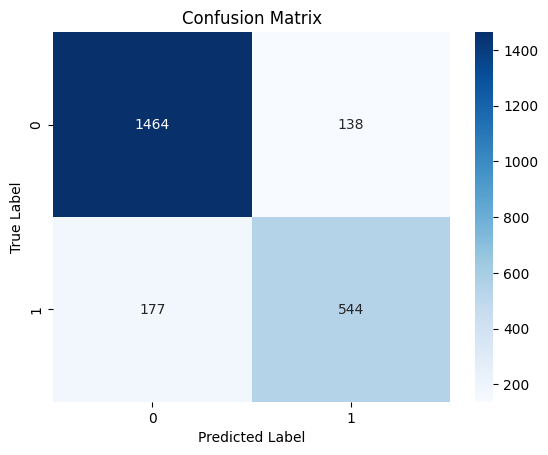

In [ ]:
# generate confusion matrix
cmsvm = confusion_matrix(y_test, y_pred_svm)

# visualize confusion matrix using heatmap
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
sns.heatmap(cmsvm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# show plot
plt.savefig('confusion_trainsvm.jpg', format='jpeg')
plt.show()

# Model Random Forest

In [ ]:
start_time_rf = time.time()
modelRF = RandomForestClassifier(random_state=0)

param_grid = {'n_estimators': [200, 300, 450],
              'max_depth': [30, 35, 40],
              'max_features': ['sqrt', 'log2'],
              'min_samples_leaf': [5, 15, 20],
              'min_samples_split': [5, 10, 12]}

grid_search_RF = GridSearchCV(modelRF, param_grid=param_grid, cv=kf)
grid_search_RF.fit(x_train_oversampled, y_train_oversampled)
print("Best parameters: ", grid_search_RF.best_params_)

modelRF_best = RandomForestClassifier(n_estimators=grid_search_RF.best_params_['n_estimators'],
                                       max_depth=grid_search_RF.best_params_['max_depth'],
                                       max_features=grid_search_RF.best_params_['max_features'],
                                       min_samples_leaf=grid_search_RF.best_params_['min_samples_leaf'],
                                       min_samples_split=grid_search_RF.best_params_['min_samples_split'],
                                       random_state=0)
modelRF_best.fit(x_train_oversampled, y_train_oversampled)

trts_acc_RF = accuracy_score(y_test, modelRF_best.predict(x_test))
print("Random Forest Accuracy: {:.2f}%".format(trts_acc_RF*100))
end_time_rf = time.time()

Best parameters:  {'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 300}
Random Forest Accuracy: 87.65%


In [ ]:
# predict test set labels
y_pred_RF = modelRF_best.predict(x_test)
# generate classification report
print(classification_report(y_test, y_pred_RF, zero_division=1))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1602
           1       0.90      0.68      0.77       721

    accuracy                           0.88      2323
   macro avg       0.89      0.82      0.84      2323
weighted avg       0.88      0.88      0.87      2323



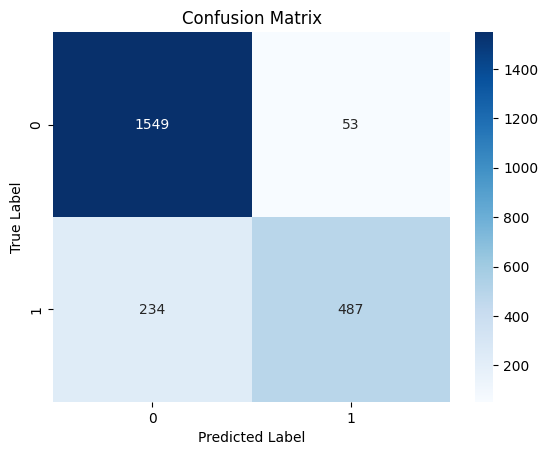

In [ ]:
# generate confusion matrix
cmrf = confusion_matrix(y_test, y_pred_RF)

# visualize confusion matrix using heatmap
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
sns.heatmap(cmrf, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# show plot
plt.savefig('confusion_trainrf.jpg', format='jpeg')
plt.show()

# Model Gradient Boosting

In [ ]:
start_time_gbc = time.time()
model_GBC = GradientBoostingClassifier()

param_grid = {'learning_rate': [0.01, 0.02],
              'subsample': [0.9, 0.5],
              'n_estimators': [100, 500],
              'max_depth': [4, 6, 8],}

grid_search_gbc = GridSearchCV(estimator=model_GBC, param_grid=param_grid, cv=kf)
grid_search_gbc.fit(x_train_oversampled, y_train_oversampled)
print("Best parameters: ", grid_search_gbc.best_params_)

modelGBC_best = GradientBoostingClassifier(learning_rate=grid_search_gbc.best_params_['learning_rate'],
                                           subsample=grid_search_gbc.best_params_['subsample'],
                                           n_estimators=grid_search_gbc.best_params_['n_estimators'],
                                           max_depth=grid_search_gbc.best_params_['max_depth'])

modelGBC_best.fit(x_train_oversampled, y_train_oversampled)
trts_acc_gbc = accuracy_score(y_test, modelGBC_best.predict(x_test))
print("Gradient Boosting Accuracy: {:.2f}%".format(trts_acc_gbc*100))
end_time_gbc = time.time()



Best parameters:  {'learning_rate': 0.02, 'max_depth': 8, 'n_estimators': 500, 'subsample': 0.9}
Gradient Boosting Accuracy: 88.20%


In [ ]:
# predict test set labels
y_pred_gbc = modelGBC_best.predict(x_test)
# generate classification report
print(classification_report(y_test, y_pred_gbc, zero_division=1))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1602
           1       0.87      0.73      0.79       721

    accuracy                           0.88      2323
   macro avg       0.88      0.84      0.86      2323
weighted avg       0.88      0.88      0.88      2323



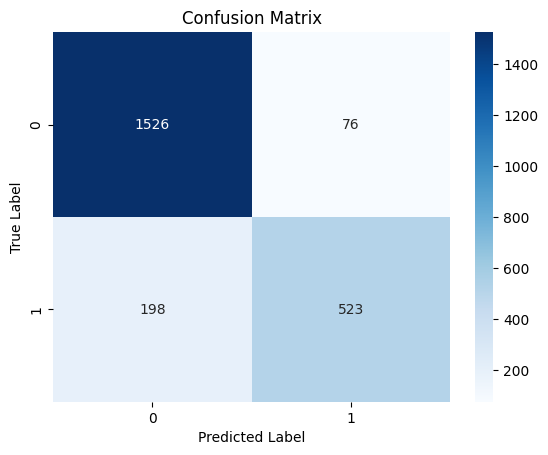

In [ ]:
# generate confusion matrix
cmgb = confusion_matrix(y_test, y_pred_gbc)

# visualize confusion matrix using heatmap
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
sns.heatmap(cmgb, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# show plot
plt.savefig('confusion_trainrf.jpg', format='jpeg')
plt.show()

# Model Stacking Ensemble (SVM-RF-GB)

- membangun model
- mengecek cross validation
- mengecek train acccuracy
- membuat classification report


Train Accuracy: 87.77%
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1602
           1       0.85      0.73      0.79       721

    accuracy                           0.88      2323
   macro avg       0.87      0.84      0.85      2323
weighted avg       0.88      0.88      0.87      2323



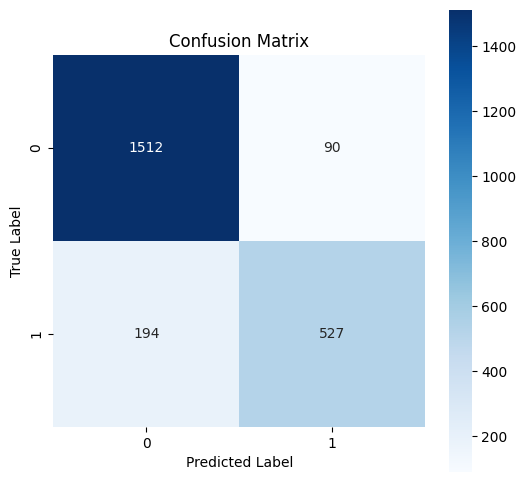

In [ ]:
start_time_ens = time.time()
base_models = [
    ('svm', modelSVM_best),
    ('Random Forest', modelRF_best),
    ('Gradient Boosting', modelGBC_best)
]

stacking_model_tr = StackingClassifier(estimators=base_models, final_estimator=RandomForestClassifier(n_estimators=10), cv=kf)
stacking_model_tr.fit(x_train_oversampled, y_train_oversampled)
y_pred_SM = stacking_model_tr.predict(x_test)

trts_acc_SM = accuracy_score(y_test, y_pred_SM)
print("Train Accuracy: {:.2f}%".format(trts_acc_SM * 100))

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_SM))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_SM)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt=".0f", cmap="Blues", square=True)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.savefig('confusion_trainse.jpg', format='jpeg')
plt.show()
end_time_ens= time.time()

# RUNNING TIME

Execution Time Model SVM: 1840.9503531455994
Execution Time Model Random Forest: 3353.8634266853333
Execution Time Model Gradient Boosting: 5489.7418377399445
Execution Time Model Ensemble: 1011.6440906524658


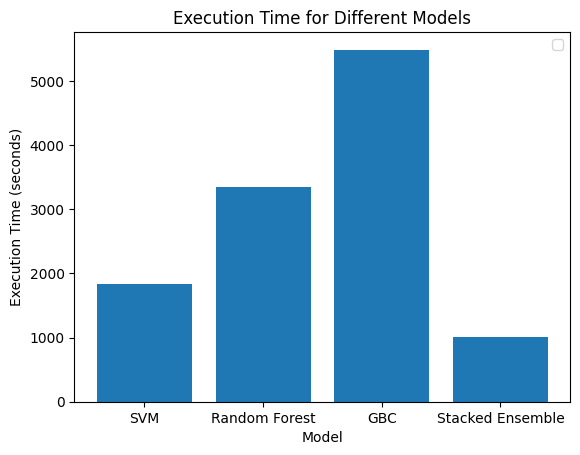

In [ ]:
import time
from sklearn import svm

# Inisialisasi timer
svm_time = []
rf_time = []
gbc_time =[]
ens_time = []

s_time = end_time_svm - start_time_svm
svm_time.append(s_time)

r_time = end_time_rf - start_time_rf
rf_time.append(r_time)

g_time = end_time_gbc - start_time_gbc
gbc_time.append(g_time)

e_time = end_time_ens - start_time_ens
ens_time.append(e_time)

# Menampilkan waktu eksekusi
print("Execution Time Model SVM:", s_time)
print("Execution Time Model Random Forest:", r_time)
print("Execution Time Model Gradient Boosting:", g_time)
print("Execution Time Model Ensemble:", e_time)

# Waktu eksekusi untuk setiap model
execution_times = [s_time, r_time, g_time, e_time]

# Nama-nama model
model_names = ['SVM', 'Random Forest', 'GBC', 'Stacked Ensemble']

# Membuat bar plot
plt.bar(model_names, execution_times)
plt.xlabel('Model')
plt.ylabel('Execution Time (seconds)')
plt.title('Execution Time for Different Models')

# Menampilkan plot
plt.legend()
plt.savefig('compariontime_trainsvm.jpg', format='jpeg')
plt.show()

# ROC-AUC

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve, RocCurveDisplay, roc_auc_score

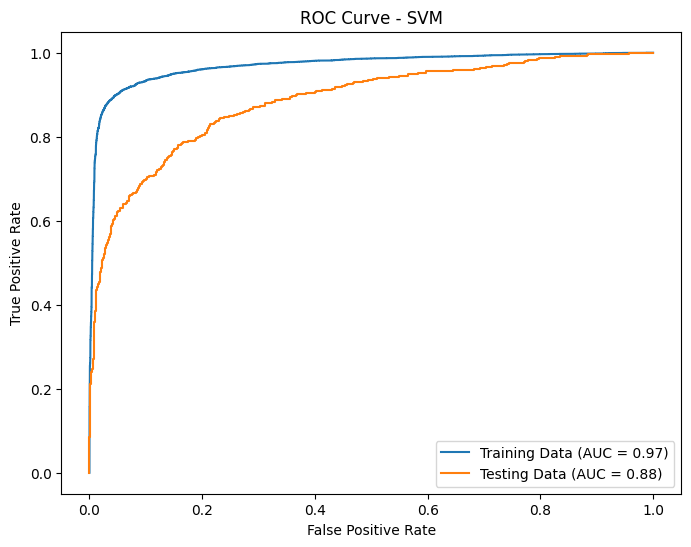

AUC Score Train:  0.9701404311199129
AUC Score Test:  0.8848959604932115


In [ ]:
##training
# Perform cross-validation predictions
y_preds_proba_ts = cross_val_predict(modelSVM_best, x_train_oversampled, y_train_oversampled, cv=kf, method='predict_proba')
y_preds_proba_ts = y_preds_proba_ts[:, 1]
# Add small noise to predictions to avoid identical FPR and TPR values
y_preds_proba_ts += np.random.uniform(low=1e-9, high=1e-8, size=y_preds_proba_ts.shape)
fpr_ts, tpr_ts, threshold_ts = roc_curve(y_train_oversampled, y_preds_proba_ts)

# check if fpr and tpr have only one value
if len(np.unique(fpr_ts)) == 1:
    fpr_ts = np.concatenate(([0.], fpr_ts))
    tpr_ts = np.concatenate(([0.], tpr_ts))
if len(np.unique(tpr_ts)) == 1:
    fpr_ts = np.concatenate(([0.], fpr_ts))
    tpr_ts = np.concatenate(([0.], tpr_ts))
auc_train = roc_auc_score(y_train_oversampled, y_preds_proba_ts)

##testing
y_preds_proba_tst = cross_val_predict(modelSVM_best, x_test, y_test, cv=kf, method='predict_proba')
y_preds_proba_tst = y_preds_proba_tst[:, 1]
y_preds_proba_tst += np.random.uniform(low=1e-9, high=1e-8, size=y_preds_proba_tst.shape)
fpr_tst, tpr_tst, threshold_tst = roc_curve(y_test, y_preds_proba_tst)

if len(np.unique(fpr_tst)) == 1:
    fpr_tst = np.concatenate(([0.], fpr_tst))
    tpr_tst = np.concatenate(([0.], tpr_tst))
if len(np.unique(tpr_tst)) == 1:
    fpr_tst = np.concatenate(([0.], fpr_tst))
    tpr_tst = np.concatenate(([0.], tpr_tst))
auc_test = roc_auc_score(y_test, y_preds_proba_tst)

# Plotting ROC Curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_ts, tpr_ts, label='Training Data (AUC = {:.2f})'.format(auc_train))
plt.plot(fpr_tst, tpr_tst, label='Testing Data (AUC = {:.2f})'.format(auc_test))
#plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM')
plt.legend(loc='lower right')
plt.savefig('rocCurve_svm.jpg', format='jpeg')
plt.show()
print("AUC Score Train: ", auc_train)
print("AUC Score Test: ", auc_test)

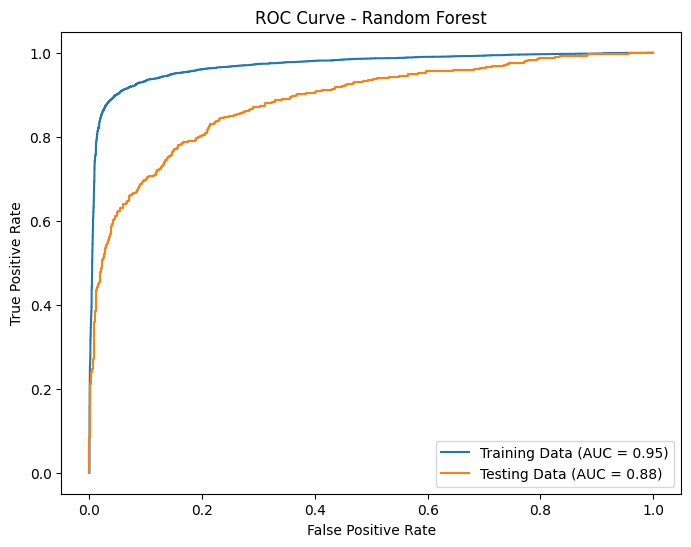

AUC Score Train:  0.9511930083171916
AUC Score Test:  0.8825722354684938


In [ ]:
#RF
##training
y_preds_proba_tf = cross_val_predict(modelRF_best, x_train_oversampled, y_train_oversampled, cv=kf, method='predict_proba')
y_preds_proba_tf = y_preds_proba_tf[:, 1]
y_preds_proba_tf += np.random.uniform(low=1e-9, high=1e-8, size=y_preds_proba_tf.shape)
fpr_tf, tpr_tf, threshold_tf = roc_curve(y_train_oversampled, y_preds_proba_tf)


if len(np.unique(fpr_tf)) == 1:
    fpr_tf = np.concatenate(([0.], fpr_tf))
    tpr_tf = np.concatenate(([0.], tpr_tf))
if len(np.unique(tpr_tf)) == 1:
    fpr_tf = np.concatenate(([0.], fpr_tf))
    tpr_tf = np.concatenate(([0.], tpr_tf))
auc_trainf = roc_auc_score(y_train_oversampled, y_preds_proba_tf)

##testing
y_preds_proba_fst = cross_val_predict(modelRF_best, x_test, y_test, cv=kf, method='predict_proba')
y_preds_proba_fst = y_preds_proba_fst[:, 1]
y_preds_proba_fst += np.random.uniform(low=1e-9, high=1e-8, size=y_preds_proba_fst.shape)
fpr_fst, tpr_fst, threshold_fst = roc_curve(y_test, y_preds_proba_fst)

if len(np.unique(fpr_fst)) == 1:
    fpr_fst = np.concatenate(([0.], fpr_fst))
    tpr_fst = np.concatenate(([0.], tpr_fst))
if len(np.unique(tpr_fst)) == 1:
    fpr_fst = np.concatenate(([0.], fpr_fst))
    tpr_fst = np.concatenate(([0.], tpr_fst))
auc_testf = roc_auc_score(y_test, y_preds_proba_fst)

# Plotting ROC Curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_ts, tpr_ts, label='Training Data (AUC = {:.2f})'.format(auc_trainf))
plt.plot(fpr_tst, tpr_tst, label='Testing Data (AUC = {:.2f})'.format(auc_testf))
#plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='lower right')
plt.savefig('rocCurve_rf.jpg', format='jpeg')
plt.show()
print("AUC Score Train: ", auc_trainf)
print("AUC Score Test: ", auc_testf)

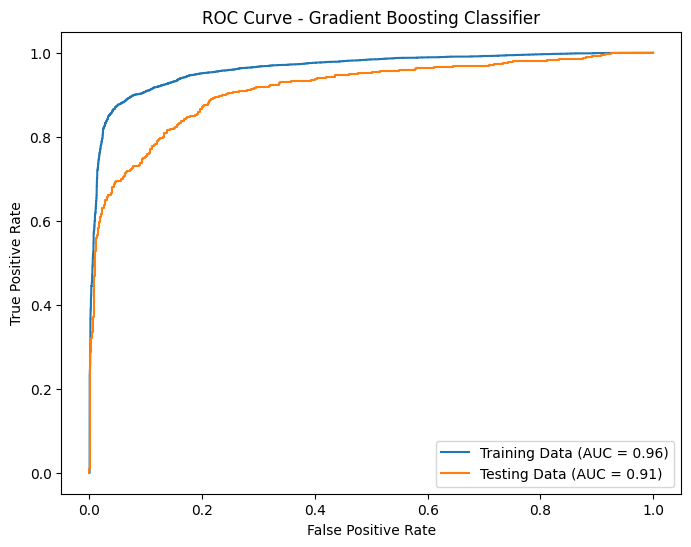

AUC Score Train:  0.9627629315425188
AUC Score Test:  0.9126966811596461


In [ ]:
#GBC
##training
y_predg_prob = cross_val_predict(modelGBC_best, x_train_oversampled, y_train_oversampled, cv=kf, method='predict_proba')
y_predg_prob = y_predg_prob[:, 1]
y_predg_prob += np.random.uniform(low=1e-9, high=1e-8, size=y_predg_prob.shape)
fpr_g, tpr_g, threshold_g = roc_curve(y_train_oversampled, y_predg_prob)

if len(np.unique(fpr_g)) == 1:
    fpr_g = np.concatenate(([0.], fpr_g))
    tpr_g = np.concatenate(([0.], tpr_g))
if len(np.unique(tpr_g)) == 1:
    fpr_g = np.concatenate(([0.], fpr_g))
    tpr_g = np.concatenate(([0.], tpr_g))
auc_train_g = roc_auc_score(y_train_oversampled, y_predg_prob)

##testing
y_predg_proba_n = cross_val_predict(modelGBC_best, x_test, y_test, cv=kf, method='predict_proba')
y_predg_proba_n = y_predg_proba_n[:, 1]
y_predg_proba_n += np.random.uniform(low=1e-9, high=1e-8, size=y_predg_proba_n.shape)
fpr_b, tpr_b, threshold_b = roc_curve(y_test, y_predg_proba_n)

if len(np.unique(fpr_b)) == 1:
    fpr_b = np.concatenate(([0.], fpr_b))
    tpr_b = np.concatenate(([0.], tpr_b))
if len(np.unique(tpr_fst)) == 1:
    fpr_b = np.concatenate(([0.], fpr_b))
    tpr_b = np.concatenate(([0.], tpr_b))
auc_testb = roc_auc_score(y_test, y_predg_proba_n)

# Plotting ROC Curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_g, tpr_g, label='Training Data (AUC = {:.2f})'.format(auc_train_g))
plt.plot(fpr_b, tpr_b, label='Testing Data (AUC = {:.2f})'.format(auc_testb))
#plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gradient Boosting Classifier')
plt.legend(loc='lower right')
plt.savefig('rocCurve_ens.jpg', format='jpeg')
plt.show()
print("AUC Score Train: ", auc_train_g)
print("AUC Score Test: ", auc_testb)

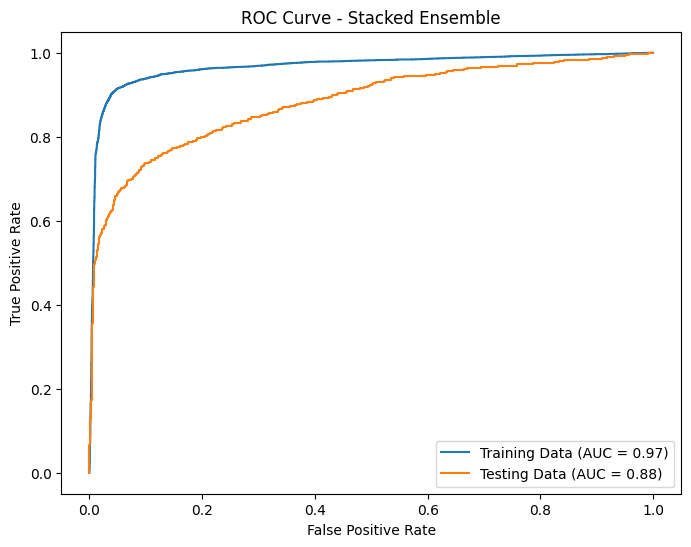

AUC Score Train:  0.967323681314932
AUC Score Test:  0.8826267789396403


In [ ]:
# Perform cross-validation predictions
y_preds_prob = cross_val_predict(stacking_model_tr, x_train_oversampled, y_train_oversampled, cv=kf, method='predict_proba')
y_preds_prob = y_preds_prob[:, 1]
y_preds_prob += np.random.uniform(low=1e-9, high=1e-8, size=y_preds_prob.shape)
fpr_e, tpr_e, threshold_e = roc_curve(y_train_oversampled, y_preds_prob)

# check if fpr and tpr have only one value
if len(np.unique(fpr_e)) == 1:
    fpr_e = np.concatenate(([0.], fpr_e))
    tpr_e = np.concatenate(([0.], tpr_e))
if len(np.unique(tpr_e)) == 1:
    fpr_e = np.concatenate(([0.], fpr_e))
    tpr_e = np.concatenate(([0.], tpr_e))
auc_traine = roc_auc_score(y_train_oversampled, y_preds_prob)

##testing
y_preds_proba_n = cross_val_predict(stacking_model_tr, x_test, y_test, cv=kf, method='predict_proba')
y_preds_proba_n = y_preds_proba_n[:, 1]
y_preds_proba_n += np.random.uniform(low=1e-9, high=1e-8, size=y_preds_proba_n.shape)
fpr_n, tpr_n, threshold_n = roc_curve(y_test, y_preds_proba_n)

if len(np.unique(fpr_n)) == 1:
    fpr_n = np.concatenate(([0.], fpr_n))
    tpr_n = np.concatenate(([0.], tpr_n))
if len(np.unique(tpr_fst)) == 1:
    fpr_n = np.concatenate(([0.], fpr_n))
    tpr_n = np.concatenate(([0.], tpr_n))
auc_teste = roc_auc_score(y_test, y_preds_proba_n)

# Plotting ROC Curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_e, tpr_e, label='Training Data (AUC = {:.2f})'.format(auc_traine))
plt.plot(fpr_n, tpr_n, label='Testing Data (AUC = {:.2f})'.format(auc_teste))
#plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Stacked Ensemble')
plt.legend(loc='lower right')
plt.savefig('rocCurve_ens.jpg', format='jpeg')
plt.show()
print("AUC Score Train: ", auc_traine)
print("AUC Score Test: ", auc_teste)